In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn
%matplotlib inline

### Читаем файл с ТОП-100 групп и создаем датафрейм

In [2]:
json_file = 'top100.json'

In [3]:
groups = pd.read_json(json_file, typ='frame', encoding='utf-8', orient='records')[:5]

In [4]:
groups.head()

,count,id,title
0,54600,23064236,Четкие Приколы
1,53341,22822305,Команда ВКонтакте
2,53039,26419239,Смейся до слёз :D
3,50288,12382740,ЁП
4,47121,40567146,Лайфхак


### Для каждой из 5 первых групп читаем файл с данными и создаем датафрейм

In [5]:
group_num = 0 # поставить значение от 0 до 4

In [6]:
json_file = os.path.join('members_data','group_{}_members.json'.format(groups['id'][group_num]))

In [7]:
source_data = pd.read_json(json_file, typ='frame', encoding='utf-8', orient='records')

In [20]:
# для примера возьмем для анализа только первые 100000 записей (быстрее строятся графики)
group_members = source_data.loc[0:100000].copy()

In [21]:
group_members.head()

,bdate,sex
0,18.12,2
1,None,2
2,None,2
3,28.3.1984,2
4,7.9,1


### Преобразовываем дату рождения к возрасту, переименовываем столбцы

In [22]:
group_members['bdate'] = group_members['bdate'].astype('str')
def change_rule(x):
    bdate = x.split('.')
    if len(bdate) == 3:
        age = int(2017 - int(bdate[2]))
        return age
    else:
        return None
group_members['bdate'] = group_members['bdate'].map(change_rule)
group_members['sex'] = group_members['sex'].map({1: 'Женский', 2: 'Мужской'})
group_members = group_members.rename(columns={'bdate':'age','sex':'gender'})
group_members.head()

,age,gender
0,NaN,Мужской
1,NaN,Мужской
2,NaN,Мужской
3,33.0,Мужской
4,NaN,Женский


### Строим графики

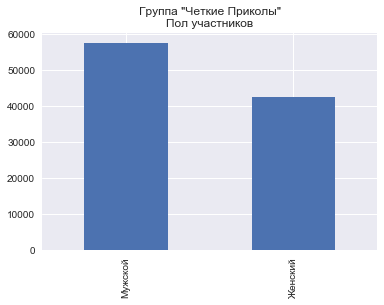

In [23]:
plot_title = 'Группа "{}"\nПол участников'.format(groups['title'][group_num])
pd.value_counts(group_members.gender).plot.bar(title=plot_title)

In [24]:
bins = [10, 15, 20, 30, 40, 80, 120]
age_titles = ['10-15', '16-20', '21-30', '31-40', '41-80', '81 и старше']
age_categories = pd.cut(group_members.age, bins, labels=age_titles)

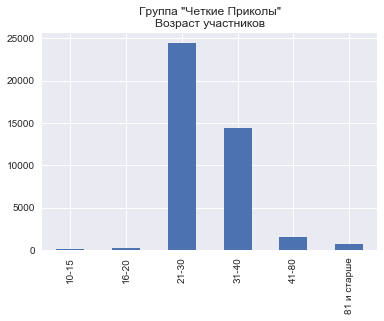

In [25]:
plot_title = 'Группа "{}"\nВозраст участников'.format(groups['title'][group_num])
pd.value_counts(age_categories).sort_index().plot.bar(title=plot_title)